In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/flickr8k-sau/flickr8k-sau/"))

# Any results you write to the current directory are saved as output.

['Flickr_Data']


In [2]:
print(os.listdir("../"))


['working', 'src', 'input', 'lib']


In [3]:
dir_annotation = '../input/flickr8k-sau/flickr8k-sau/Flickr_Data/Flickr_TextData'

def read_file(file):
    with open(os.path.join(dir_annotation, file), 'r') as f:
        lines = f.read().splitlines()
    return lines

In [4]:
train_img_path = read_file('Flickr_8k.trainImages.txt')
test_img_path = read_file('Flickr_8k.testImages.txt')
val_img_path = read_file('Flickr_8k.devImages.txt')
captions = read_file('Flickr8k.token.txt')


In [5]:
df_captions = pd.read_csv('../input/flickr8k-sau/flickr8k-sau/Flickr_Data/Flickr_TextData/'+'Flickr8k.token.txt', sep='\t', header=None)
df_captions.columns=['image', 'caption']

In [6]:
df_captions[['image', 'caption_num']] = df_captions.image.str.split('#', expand=True)

In [7]:
df_captions.caption = df_captions.caption.apply(lambda x : '<start> '+x+' <end>')

In [8]:
df_captions.head()

,image,caption,caption_num
0,1000268201_693b08cb0e.jpg,<start> A child in a pink dress is climbing up...,0
1,1000268201_693b08cb0e.jpg,<start> A girl going into a wooden building . ...,1
2,1000268201_693b08cb0e.jpg,<start> A little girl climbing into a wooden p...,2
3,1000268201_693b08cb0e.jpg,<start> A little girl climbing the stairs to h...,3
4,1000268201_693b08cb0e.jpg,<start> A little girl in a pink dress going in...,4


In [9]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [10]:
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(df_captions.caption)

In [11]:
# print(tokenizer.word_counts)
# print(tokenizer.document_count)
# print(tokenizer.word_index)
# print(tokenizer.word_docs)
tokenizer.__dict__.keys()

dict_keys(['word_counts', 'word_docs', 'filters', 'split', 'lower', 'num_words', 'document_count', 'char_level', 'oov_token', 'index_docs', 'word_index', 'index_word'])

In [12]:
len(tokenizer.word_index)

8495

In [13]:
# tokenizer.word_index.values()

In [14]:
df_captions['sequence'] = df_captions.caption.apply(lambda x : tokenizer.texts_to_sequences([x])[0])

In [15]:
max_words = df_captions.sequence.apply(len).max()

In [16]:
from keras.preprocessing.sequence import pad_sequences 

In [17]:
df_captions.sequence = df_captions.sequence.apply(lambda x: pad_sequences([x],padding='post', maxlen=max_words)[0])

In [18]:
df_captions.head(8)

,image,caption,caption_num,sequence
0,1000268201_693b08cb0e.jpg,<start> A child in a pink dress is climbing up...,0,"[2, 1, 43, 4, 1, 90, 172, 7, 119, 51, 1, 394, ..."
1,1000268201_693b08cb0e.jpg,<start> A girl going into a wooden building . ...,1,"[2, 1, 19, 316, 64, 1, 196, 117, 3, 0, 0, 0, 0..."
2,1000268201_693b08cb0e.jpg,<start> A little girl climbing into a wooden p...,2,"[2, 1, 40, 19, 119, 64, 1, 196, 2437, 3, 0, 0,..."
3,1000268201_693b08cb0e.jpg,<start> A little girl climbing the stairs to h...,3,"[2, 1, 40, 19, 119, 5, 395, 20, 60, 2437, 3, 0..."
4,1000268201_693b08cb0e.jpg,<start> A little girl in a pink dress going in...,4,"[2, 1, 40, 19, 4, 1, 90, 172, 316, 64, 1, 196,..."
5,1001773457_577c3a7d70.jpg,<start> A black dog and a spotted dog are figh...,0,"[2, 1, 15, 9, 8, 1, 843, 9, 17, 343, 3, 0, 0, ..."
6,1001773457_577c3a7d70.jpg,<start> A black dog and a tri-colored dog play...,1,"[2, 1, 15, 9, 8, 1, 1575, 235, 9, 34, 10, 137,..."
7,1001773457_577c3a7d70.jpg,<start> A black dog and a white dog with brown...,2,"[2, 1, 15, 9, 8, 1, 14, 9, 10, 27, 1001, 17, 6..."


In [19]:
word_index = tokenizer.word_index
index_word = {}
for idx, word in zip(word_index.values(), word_index.keys()):
        index_word[idx] = word

In [20]:
voc_size = len(word_index)+1# +1 for 0 padding

In [21]:
# class ImgModel:
#     def __init__(self):
#         vgg = VGG16(weights='imagenet', include_top=True)
#         self.model = Model(inputs=vgg.input, outputs=vgg.get_layer('fc2').output)

#     @staticmethod
#     def preprocess_img(img_path):
#         img = image.load_img(img_path, target_size=(224,224))
#         img = image.img_to_array(img)
#         img = np.expand_dims(img, axis=0)
#         img = preprocess_input(img)
#         return img

#     def extract_feature_single_img(self, img_name):
#         img = self.preprocess_img('Flicker8k_Dataset/'+img_name)
#         features = self.model.predict(img)
#         return features.reshape((4096,1))

#     def extract_feature_imgs(self, img_names, saved_file_name):
#         features = []
#         length = len(img_names)
#         for i, img_name in enumerate(img_names):
#             if i%100 == 0:
#                 print('files {}/{} files'.format(i, length))
#             features.append(self.extract_feature_single_img(img_name))
#         with open(saved_file_name, 'wb') as f:
#             pickle.dump(features, f)

# imgModel = ImgModel()
# imgModel.extract_feature_imgs(train_img_path, 'train_features.p')

In [22]:
with open('../input/img-features/train_features.p', 'rb') as f:
    train_img = pickle.load(f)
with open('../input/img-features/test_features.p', 'rb') as f:
    test_img = pickle.load(f)

In [23]:
def get_vector(img_path):
    try:
        try:
            return train_img[train_img_path.index(img_path)].flatten()
        except:
            return test_img[test_img_path.index(img_path)].flatten()
    except:
        return None

In [24]:
df_captions['img_vect'] = df_captions.image.apply(lambda x: get_vector(x))

In [25]:
df_captions.head()

,image,caption,caption_num,sequence,img_vect
0,1000268201_693b08cb0e.jpg,<start> A child in a pink dress is climbing up...,0,"[2, 1, 43, 4, 1, 90, 172, 7, 119, 51, 1, 394, ...","[2.5076475, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15..."
1,1000268201_693b08cb0e.jpg,<start> A girl going into a wooden building . ...,1,"[2, 1, 19, 316, 64, 1, 196, 117, 3, 0, 0, 0, 0...","[2.5076475, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15..."
2,1000268201_693b08cb0e.jpg,<start> A little girl climbing into a wooden p...,2,"[2, 1, 40, 19, 119, 64, 1, 196, 2437, 3, 0, 0,...","[2.5076475, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15..."
3,1000268201_693b08cb0e.jpg,<start> A little girl climbing the stairs to h...,3,"[2, 1, 40, 19, 119, 5, 395, 20, 60, 2437, 3, 0...","[2.5076475, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15..."
4,1000268201_693b08cb0e.jpg,<start> A little girl in a pink dress going in...,4,"[2, 1, 40, 19, 4, 1, 90, 172, 316, 64, 1, 196,...","[2.5076475, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15..."


In [26]:
df_captions.count()

image          40460
caption        40460
caption_num    40460
sequence       40460
img_vect       35000
dtype: int64

In [27]:
df_captions = df_captions.dropna()

In [28]:
df_captions.count()

image          35000
caption        35000
caption_num    35000
sequence       35000
img_vect       35000
dtype: int64

In [29]:
# df_captions[['sequence', 'img_vect']].sample(n=512)

In [30]:
data_caption, data_img = np.vstack(df_captions.sequence.values), np.vstack(df_captions.img_vect.values)

In [31]:
from keras.utils import to_categorical

In [32]:
def generate_batch(batch_size):
    while True:
        l = list(np.random.choice(30000, batch_size, replace=False))
        x = [data_img[l], data_caption[l,:-1]]
        y = data_caption[l,1:]
        y = to_categorical(y, num_classes=voc_size)
        yield x, y

In [33]:
def generate_val(batch_size):
    while True:
        l = list(np.random.choice(range(30000,35000), batch_size, replace=False))
        x = [data_img[l], data_caption[l,:-1]]
        y = data_caption[l,1:]
        y = to_categorical(y, num_classes=voc_size)
        yield x, y

In [34]:
generator = generate_batch(512)

In [35]:
generator_val = generate_batch(32)

In [36]:
%%time
generator.__next__()
print('done')

done
CPU times: user 12 ms, sys: 32 ms, total: 44 ms
Wall time: 46.3 ms


In [37]:
rnn_input_length = max_words - 1

In [38]:
from keras.layers import Input, Embedding, GRU, TimeDistributed, Dense
from keras.models import Model

In [39]:
def build_model(hidden_size=512):
    init_states_input = Input(shape=(4096,), name='init_states')
    decoder_inputs = Input(shape=(rnn_input_length,), name='decoder_inputs')
    init_states = Dense(hidden_size, activation='tanh')(init_states_input)
    x_lang = Embedding(voc_size, hidden_size, input_length=rnn_input_length)(decoder_inputs)
    x_lang = GRU(hidden_size, return_sequences=True)(x_lang, initial_state=init_states)
    x_lang = GRU(hidden_size, return_sequences=True)(x_lang, initial_state=init_states)
    x_lang = GRU(hidden_size, return_sequences=True)(x_lang, initial_state=init_states)
    outputs_lang = TimeDistributed(Dense(voc_size, name='decoder_ouputs', activation='softmax'))(x_lang)
    model = Model(inputs=[init_states_input, decoder_inputs], outputs=[outputs_lang])
#         model = keras_to_tpu_model(model,strategy=tf.contrib.tpu.TPUDistributionStrategy(tf.contrib.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])))

    return model

In [40]:
model = build_model()

In [41]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
decoder_inputs (InputLayer)     (None, 38)           0                                            
__________________________________________________________________________________________________
init_states (InputLayer)        (None, 4096)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 38, 512)      4349952     decoder_inputs[0][0]             
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 512)          2097664     init_states[0][0]                
__________________________________________________________________________________________________
gru_1 (GRU

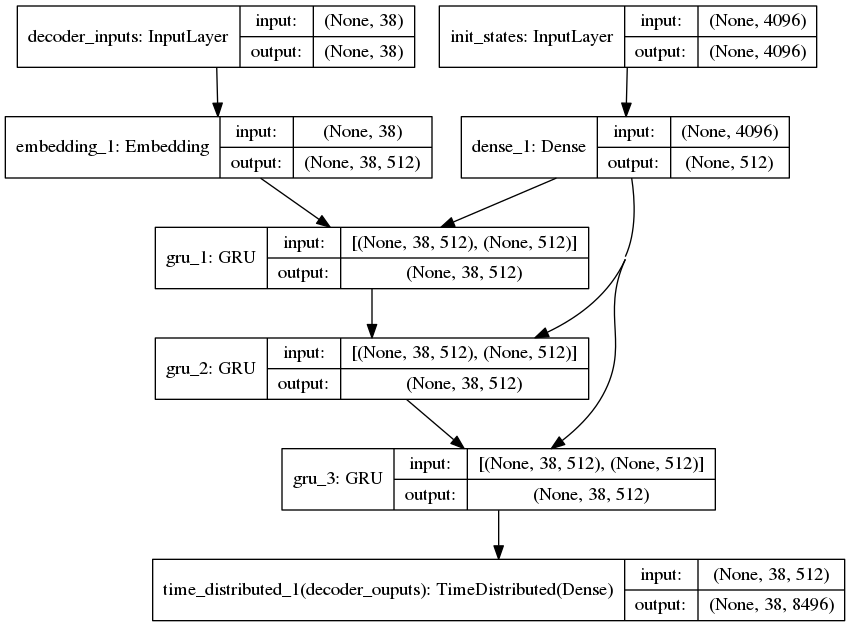

In [42]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png', width=32, height=32)

In [43]:
from keras.callbacks import ModelCheckpoint

In [44]:
def train_model(epoch = 200, steps_per_epoch=30, checkpoint_path='model_checkpoint'):
    model.compile(loss='categorical_crossentropy', optimizer = 'RMSProp')
    checkpoint_dir = os.path.dirname(checkpoint_path)
    cp_callback = ModelCheckpoint(checkpoint_path, save_weights_only=True,verbose=1)       
    model.fit_generator(generator, steps_per_epoch=steps_per_epoch, epochs=epoch, callbacks = [cp_callback],verbose=2, validation_data=generator_val, validation_steps=1)

In [45]:
train_model()

Epoch 1/200
 - 35s - loss: 2.5399 - val_loss: 1.5530

Epoch 00001: saving model to model_checkpoint
Epoch 2/200
 - 31s - loss: 1.5582 - val_loss: 1.6760

Epoch 00002: saving model to model_checkpoint
Epoch 3/200
 - 31s - loss: 1.3662 - val_loss: 5.0945

Epoch 00003: saving model to model_checkpoint
Epoch 4/200
 - 32s - loss: 1.3938 - val_loss: 1.2377

Epoch 00004: saving model to model_checkpoint
Epoch 5/200
 - 31s - loss: 1.1948 - val_loss: 1.1071

Epoch 00005: saving model to model_checkpoint
Epoch 6/200
 - 31s - loss: 1.1353 - val_loss: 1.1692

Epoch 00006: saving model to model_checkpoint
Epoch 7/200
 - 31s - loss: 1.0664 - val_loss: 1.1059

Epoch 00007: saving model to model_checkpoint
Epoch 8/200
 - 31s - loss: 1.0261 - val_loss: 1.1742

Epoch 00008: saving model to model_checkpoint
Epoch 9/200
 - 32s - loss: 0.9924 - val_loss: 1.0739

Epoch 00009: saving model to model_checkpoint
Epoch 10/200
 - 31s - loss: 0.9454 - val_loss: 1.0275

Epoch 00010: saving model to model_checkpoint

In [46]:
print(os.listdir('./'))

['model_checkpoint', '__output__.json', 'model.png', '__notebook__.ipynb']


In [47]:
df_captions.head()

,image,caption,caption_num,sequence,img_vect
0,1000268201_693b08cb0e.jpg,<start> A child in a pink dress is climbing up...,0,"[2, 1, 43, 4, 1, 90, 172, 7, 119, 51, 1, 394, ...","[2.5076475, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15..."
1,1000268201_693b08cb0e.jpg,<start> A girl going into a wooden building . ...,1,"[2, 1, 19, 316, 64, 1, 196, 117, 3, 0, 0, 0, 0...","[2.5076475, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15..."
2,1000268201_693b08cb0e.jpg,<start> A little girl climbing into a wooden p...,2,"[2, 1, 40, 19, 119, 64, 1, 196, 2437, 3, 0, 0,...","[2.5076475, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15..."
3,1000268201_693b08cb0e.jpg,<start> A little girl climbing the stairs to h...,3,"[2, 1, 40, 19, 119, 5, 395, 20, 60, 2437, 3, 0...","[2.5076475, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15..."
4,1000268201_693b08cb0e.jpg,<start> A little girl in a pink dress going in...,4,"[2, 1, 40, 19, 4, 1, 90, 172, 316, 64, 1, 196,...","[2.5076475, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15..."


In [48]:
len(data_img)

35000

In [49]:
df_captions.iloc[32000].img_vect.shape

(4096,)

In [50]:
def predict_captions(i, dec = model):
    captions = ["<start>"]
    while captions[-1]!="<end>" and len(captions)< max_words:
        caption_int = [word_index[i] for i in captions]
        caption_int = pad_sequences([caption_int], maxlen=max_words-1, padding='post')
        init_states = df_captions.iloc[i].img_vect# np.array(train).reshape(-1,4096)[l]
        preds = model.predict([[init_states], caption_int])
#         print(preds[0].shape)
        word_pred = index_word[np.argmax(preds[0][len(captions)-1])]
        captions.append(word_pred)   
    true_capt = df_captions[df_captions.image==df_captions.iloc[i].image]
    display(true_capt)
    #     plot_img(image_path)
    display(Image(retina=True, filename='../input/flickr8k-sau/flickr8k-sau/Flickr_Data/Images/'+df_captions.iloc[i].image, width=32, height=32))
    return ' '.join(captions)

,image,caption,caption_num,sequence,img_vect
37060,475042270_719ebe6c48.jpg,<start> A golden retriever is playing with a s...,0,"[2, 1, 392, 870, 7, 34, 10, 1, 568, 15, 8, 27,...","[0.0, 0.0, 1.8790455, 0.0, 0.5768747, 0.0, 0.0..."
37061,475042270_719ebe6c48.jpg,<start> A small black and brown dog is jumping...,1,"[2, 1, 53, 15, 8, 27, 9, 7, 45, 6, 1, 55, 88, ...","[0.0, 0.0, 1.8790455, 0.0, 0.5768747, 0.0, 0.0..."
37062,475042270_719ebe6c48.jpg,<start> A smaller black dog fighting with a la...,2,"[2, 1, 568, 15, 9, 343, 10, 1, 896, 27, 9, 4, ...","[0.0, 0.0, 1.8790455, 0.0, 0.5768747, 0.0, 0.0..."
37063,475042270_719ebe6c48.jpg,<start> Brown dog with mouth open near head of...,3,"[2, 27, 9, 10, 68, 265, 67, 160, 12, 15, 8, 15...","[0.0, 0.0, 1.8790455, 0.0, 0.5768747, 0.0, 0.0..."
37064,475042270_719ebe6c48.jpg,<start> Two dogs playing near the woods . <end>,4,"[2, 13, 31, 34, 67, 5, 241, 3, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 1.8790455, 0.0, 0.5768747, 0.0, 0.0..."


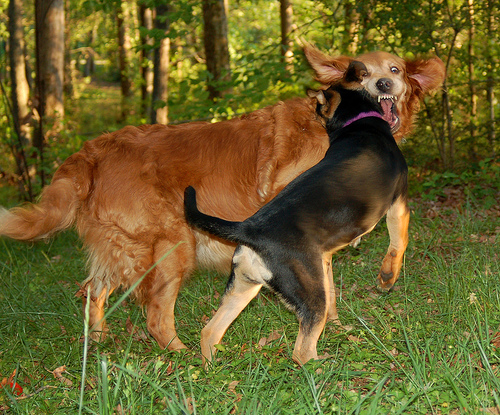

'<start> a brown dog is jumping over a white and brown dog <end>'

In [51]:
predict_captions(32000)

,image,caption,caption_num,sequence,img_vect
36705,452419961_6d42ab7000.jpg,<start> The three children are in a cage . <end>,0,"[2, 5, 47, 62, 17, 4, 1, 1585, 3, 0, 0, 0, 0, ...","[0.0, 0.0, 1.7610098, 0.0, 0.0, 0.0, 0.0, 0.0,..."
36706,452419961_6d42ab7000.jpg,<start> three children are locked in a cage . ...,1,"[2, 47, 62, 17, 3667, 4, 1, 1585, 3, 0, 0, 0, ...","[0.0, 0.0, 1.7610098, 0.0, 0.0, 0.0, 0.0, 0.0,..."
36707,452419961_6d42ab7000.jpg,<start> Three children in a black dog kennel ....,2,"[2, 47, 62, 4, 1, 15, 9, 3765, 3, 0, 0, 0, 0, ...","[0.0, 0.0, 1.7610098, 0.0, 0.0, 0.0, 0.0, 0.0,..."
36708,452419961_6d42ab7000.jpg,<start> Three small children are in a cage . <...,3,"[2, 47, 53, 62, 17, 4, 1, 1585, 3, 0, 0, 0, 0,...","[0.0, 0.0, 1.7610098, 0.0, 0.0, 0.0, 0.0, 0.0,..."
36709,452419961_6d42ab7000.jpg,<start> three well dressed blond children in a...,4,"[2, 47, 1092, 107, 261, 62, 4, 1, 1585, 3, 0, ...","[0.0, 0.0, 1.7610098, 0.0, 0.0, 0.0, 0.0, 0.0,..."


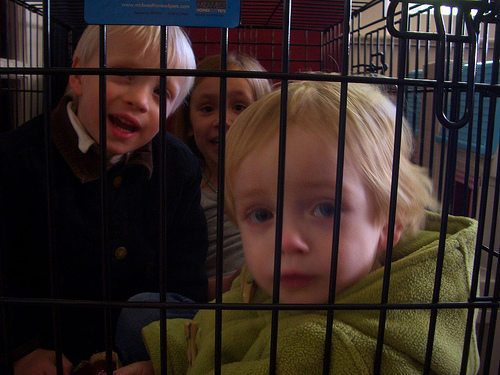

'<start> a baby looks at his hind legs while sitting in a chair with a wooden gate <end>'

In [52]:
predict_captions(np.random.choice(range(30000,35000),1)[0])